# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'3d661129cbc6f8a2cb5f69cd75f8cd55'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Base URL and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Setting counters to break up calls into Sets
record = 0
set_ct = 1

#Defining lists to build our DataFrame
temperatures = []
humidity = []
wind_speed = []
country_list = []
cloudy = []
dates = []
latitude = []
longitude = []
city_df = []

#Beginning the print log
print("Beginning Data Retrieval")
print("-----------------------------")

#Beginning the loop to create calls
for city in cities:
    
    #Tracking the Records
    record += 1
    
    try:
        #Building the query and making the call
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"Processing Record {record} of Set {set_ct} | {city}")
        time.sleep(1)
        
        #Pulling information for the DataFrame
        city_df.append(weather_json["name"])
        temperatures.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        wind_speed.append(weather_json["wind"]["speed"])
        country_list.append(weather_json["sys"]["country"])
        cloudy.append(weather_json["clouds"]["all"])  
        dates.append(weather_json["dt"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])

    #Handling Exceptions
    except KeyError:
        print("City not found. Skipping...")
        
    #Resetting the records and sets
    if record == 50:
        record = 0
        set_ct += 1
        

#Ending the print log
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | shenjiamen
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | pangody
Processing Record 8 of Set 1 | dwarka
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | balykshi
City not found. Skipping...
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | juneau
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | punta 

Processing Record 35 of Set 4 | luxor
Processing Record 36 of Set 4 | kulhudhuffushi
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | worland
Processing Record 39 of Set 4 | chapais
Processing Record 40 of Set 4 | vulcan
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | liverpool
Processing Record 43 of Set 4 | taseyevo
Processing Record 44 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 45 of Set 4 | sobolevo
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | butaritari
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | mae chan
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | henties bay
Processing Record 6 of Set 5 | omsukcha

Processing Record 16 of Set 8 | matao
Processing Record 17 of Set 8 | itaituba
Processing Record 18 of Set 8 | bilma
Processing Record 19 of Set 8 | maniitsoq
Processing Record 20 of Set 8 | quillota
Processing Record 21 of Set 8 | crotone
Processing Record 22 of Set 8 | yinchuan
Processing Record 23 of Set 8 | contamana
Processing Record 24 of Set 8 | sayyan
Processing Record 25 of Set 8 | kavaratti
Processing Record 26 of Set 8 | nebolchi
Processing Record 27 of Set 8 | xai-xai
Processing Record 28 of Set 8 | kawambwa
Processing Record 29 of Set 8 | havelock
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | port elizabeth
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | willowmore
Processing Record 35 of Set 8 | arman
Processing Record 36 of Set 8 | waipawa
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | bismarck
Processing Record 39 of Set 8 | elko
Processing Record 4

Processing Record 3 of Set 12 | sept-iles
Processing Record 4 of Set 12 | praia da vitoria
Processing Record 5 of Set 12 | ravar
Processing Record 6 of Set 12 | zlatograd
Processing Record 7 of Set 12 | mangai
Processing Record 8 of Set 12 | moa
Processing Record 9 of Set 12 | ambunti
Processing Record 10 of Set 12 | vestmannaeyjar
Processing Record 11 of Set 12 | bathurst
Processing Record 12 of Set 12 | qaqortoq
Processing Record 13 of Set 12 | huarmey
Processing Record 14 of Set 12 | upata
Processing Record 15 of Set 12 | berlevag
Processing Record 16 of Set 12 | natchitoches
Processing Record 17 of Set 12 | jiaocheng
Processing Record 18 of Set 12 | wilmington
Processing Record 19 of Set 12 | blackfoot
Processing Record 20 of Set 12 | brufut
Processing Record 21 of Set 12 | corrente
Processing Record 22 of Set 12 | emilio carranza
Processing Record 23 of Set 12 | genhe
Processing Record 24 of Set 12 | coachella
Processing Record 25 of Set 12 | ust-nera
Processing Record 26 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Creating the DataFrame from the previously called/created lists
weather_df = pd.DataFrame({
    "City": city_df,
    "Cloudiness": cloudy,
    "Country": country_list,
    "Date": dates,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temperatures,
    "Wind Speed": wind_speed  
    })

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,80,CK,1566676959,78,-21.21,-159.78,77.00,8.05
1,Shenjiamen,66,CN,1566676960,87,29.96,122.30,82.64,13.96
2,Magadan,99,RU,1566676961,95,59.56,150.80,52.76,4.54
3,Barrow,67,AR,1566676963,63,-38.31,-60.23,59.78,9.51
4,Atuona,4,PF,1566676965,70,-9.80,-139.03,79.22,12.77


In [10]:
weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [12]:
# Export file as a CSV
weather_df.to_csv("Output/CityData.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

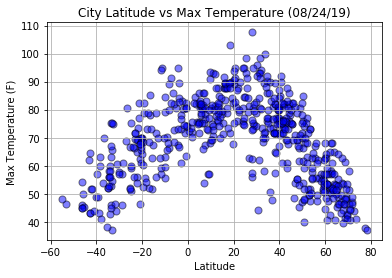

In [20]:
plt.title("City Latitude vs Max Temperature (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(latitude, temperatures, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)

In [13]:
plt.savefig("Output/LatVsMaxTemp.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

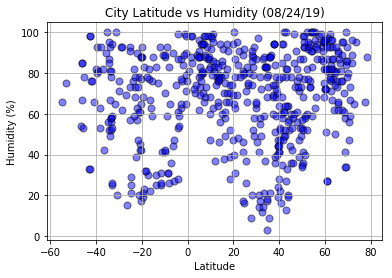

In [21]:
plt.title("City Latitude vs Humidity (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)

In [14]:
plt.savefig("Output/LatVsHum.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

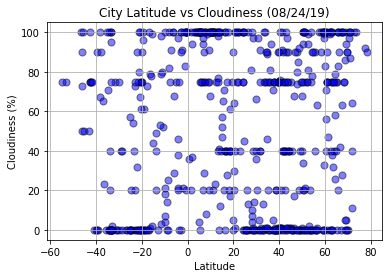

In [22]:
plt.title("City Latitude vs Cloudiness (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(latitude, cloudy, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)

In [16]:
plt.savefig("Output/LatVsCloud.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

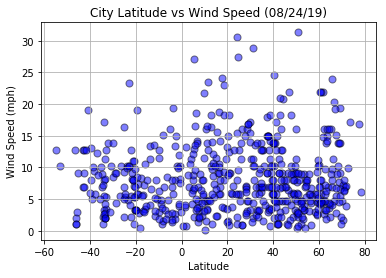

In [17]:
plt.title("City Latitude vs Wind Speed (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)

In [18]:
plt.savefig("Output/LatVsWind.png")

<Figure size 432x288 with 0 Axes>